A saída de streaming foi truncada nas últimas 5000 linhas.
Test Loss at iteration 35: 0.4
Test Loss at iteration 35: 0.8
Test Loss at iteration 36: 0.8
Test Loss at iteration 36: 0.8
Test Loss at iteration 36: 0.8
Test Loss at iteration 36: 0.4
Test Loss at iteration 36: 0.4
Test Loss at iteration 36: 0.4
Test Loss at iteration 36: 0.4
Test Loss at iteration 37: 0.4
Test Loss at iteration 37: 0.4
Test Loss at iteration 37: 0.4
Test Loss at iteration 37: 0.4
Test Loss at iteration 37: 0.4
Test Loss at iteration 37: 0.4
Test Loss at iteration 37: 0.8
Test Loss at iteration 38: 0.8
Test Loss at iteration 38: 0.8
Test Loss at iteration 38: 0.8
Test Loss at iteration 38: 0.4
Test Loss at iteration 38: 0.4
Test Loss at iteration 38: 0.4
Test Loss at iteration 38: 0.4
Test Loss at iteration 39: 0.4
Test Loss at iteration 39: 0.4
Test Loss at iteration 39: 0.4
Test Loss at iteration 39: 0.4
Test Loss at iteration 39: 0.4
Test Loss at iteration 39: 0.4
Test Loss at iteration 39: 0.8
Test Loss a

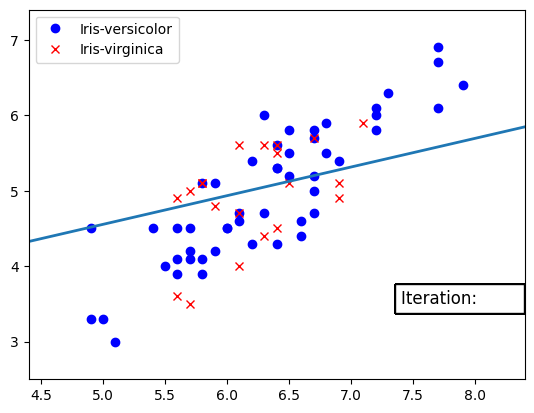

In [1]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

class Perceptron():
    def __init__(self, eta=0.1, n_iter=50, batch_size=1, nameA='', nameB=''):
        self.eta = eta
        self.n_iter = n_iter
        self.batch_size = batch_size
        self.nameA = nameA
        self.nameB = nameB

    def step_fit(self, X, y, X_test, y_test):
        for _ in range(self.n_iter):
            for batch_start in range(0, len(X), self.batch_size):
                batch_end = batch_start + self.batch_size
                X_batch = X[batch_start:batch_end]
                y_batch = y[batch_start:batch_end]
                update = self.eta * (y_batch - self.predict(X_batch))
                self.w_[1:] += np.mean(update[:, np.newaxis] * X_batch, axis=0)
                self.w_[0] += np.mean(update)
                test_loss = self.compute_test_loss(X_test, y_test)  # Calculate test loss
                print(f'Test Loss at iteration {_}: {test_loss}')  # Print test loss during training

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def init_plot(self):
        self.line.set_data([],[])
        return self.line,

    def animate(self, iteration_number, X, y):
        self.step_fit(X, y, X_test, y_test)
        x, y = self.plot_line(X)
        self.line.set_data(x, y)
        if iteration_number % 2 == 0:
            self.ax.text(max(X[:,0])-0.5, min(X[:,1])+0.5, f'Iteration: {iteration_number}', fontsize=12)
        else:
            self.ax.text(max(X[:,0])-0.5, min(X[:,1])+0.5, 'Iteration:'+' '*8, fontsize=12, bbox=dict(facecolor='white', alpha=1))
        return self.line,

    def plot_line(self, X):
        x = []
        y = []
        slope = -(self.w_[0] / self.w_[2]) / (self.w_[0] / self.w_[1])
        intercept = -self.w_[0] / self.w_[2]
        for i in np.linspace(np.amin(X[:,0])-0.5,np.amax(X[:,0])+0.5):
            x.append(i)
            y.append((slope*i) + intercept)
        return x, y

    def compute_test_loss(self, X_test, y_test):
        return np.mean((y_test - self.predict(X_test)) ** 2)  # Compute mean squared error for test set

    def animated_fit(self, X, y, X_test, y_test):
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])] #randomly initialize weights
        self.fig = plt.figure()
        self.ax = plt.axes(xlim=(min(X[:,0])-0.5, max(X[:,0])+0.5), ylim=(min(X[:,1])-0.5, max(X[:,1])+0.5))
        self.ax.plot(X[0:50, 0],X[0:50, 1], "bo", label=self.nameA)
        self.ax.plot(X[50:100, 0],X[50:100, 1], "rx", label=self.nameB)
        self.ax.legend(loc='upper left')
        self.line, = self.ax.plot([], [], lw=2)
        anim = FuncAnimation(self.fig, self.animate, init_func=self.init_plot, fargs=(X, y,), frames=self.n_iter, interval=200, blit=True)
        anim.save('learning_process.gif', writer='imagemagick')

# Carregar dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

SPECIES_1 = {'name':"Iris-setosa",'s':0,'end':50}
SPECIES_2 = {'name':"Iris-versicolor",'s':50,'end':100}
SPECIES_3 = {'name':"Iris-virginica",'s':100,'end':150}
spA, spB = SPECIES_2, SPECIES_3

# Preparar os dados
X = df.iloc[np.r_[spA['s']:spA['end'],spB['s']:spB['end']], [0,2]].values
y = df.iloc[np.r_[spA['s']:spA['end'],spB['s']:spB['end']], 4].values
y = np.where(y == spB['name'], -1, 1)

# Dividir o conjunto de dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar e treinar o Perceptron
ppn = Perceptron(eta=0.1, n_iter=150, batch_size=10, nameA=spA['name'], nameB=spB['name'])
ppn.animated_fit(X_train, y_train, X_test, y_test)
